This is the original graphing of the dataset without any clustering.


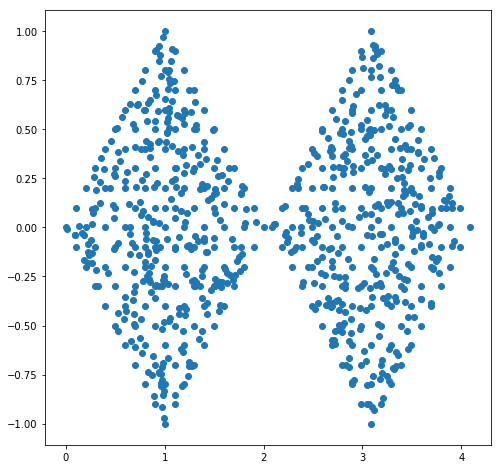

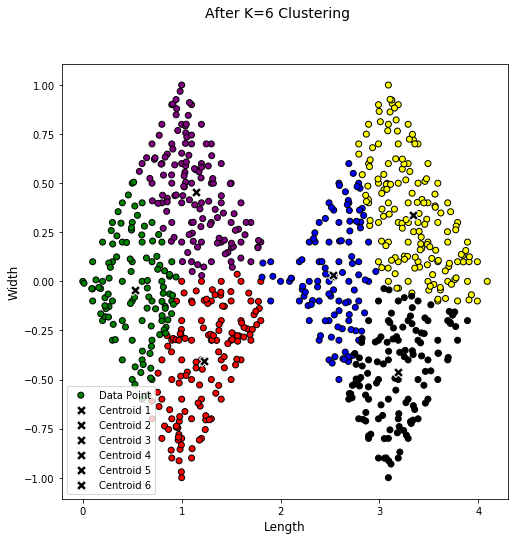

Note that sometimes, the random initial clustering can lead to having a blank centroid in the legend. Just run the program again and it should update within 1 or 2 instances. Each centroid is marked by an X. It maybe difficult to see all the centroids.


In [8]:
#A3 by svadivazhagu for CS-534 Fall'2018

#Problem 1, Implementing K-Means on cluster_data.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline 


xCoords = []
yCoords = []
zippedList = []

#Prep the dataset to be accessed. Removes the line # and splits x and y coordinates
#into their own arrays. Dataset -> 2d[] -> 2 1d[]'s
def prepData():
    with open("cluster_data.txt") as textFile:
        lines = [line.split() for line in textFile]

    for i in range(len(lines)):
        lines[i].pop(0)
    for i in range (len(lines)):
        xCoords.append(float(lines[i][0]))
        yCoords.append(float(lines[i][1]))

prepData()

zippedPoints  = list(zip(xCoords, yCoords))
print("This is the original graphing of the dataset without any clustering.")
fig = plt.figure(figsize=(8, 8))
plt.scatter(xCoords, yCoords)
plt.show()


df = pd.DataFrame({
    'x': xCoords,
    'y': yCoords
})

np.random.seed(200)
k = 6
# centroids[i] = [x, y]
centroids = {
    i + 1: [random.randint(1, 2), random.uniform(-0.005, 0.005 )]
    for i in range(k)
}

colmap = {1: 'red', 2: 'green', 3: 'blue', 4:'yellow', 5:'purple', 6:'black'}

#Assigning points to dataset based on Euclidean Distance

def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)


#Update the centroids based on cluster's points.
import copy

old_centroids = copy.deepcopy(centroids)


def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k


centroids = update(centroids)


#Assignment again.
df = assignment(df, centroids)


# Stop only when the change from cluster to cluster is negligible.
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=1, edgecolor='k', label = "Data Point")
for i in centroids.keys():
    plt.scatter(*centroids[i], color='black', alpha = 1, s = 100, edgecolor = 'white', marker="X", label = "Centroid "+str(i))
fig.suptitle('After K=' + str(k) + ' Clustering', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Width', fontsize=12)
plt.legend(loc='lower left')
plt.show()

print("Note that sometimes, the random initial clustering can lead to having a"
      " blank centroid in the legend. Just run the program again and it should update within 1 or 2 instances."
      " Each centroid is marked by an X. It may"
      "be difficult to see all the centroids.")





Findings for this: It is easy to see how the centroids are well calculated to represent the cluster well. They are in the center of each cluster. The implementation shows how this originally-1-cluster dataset can be classified into `k=n` clusters. There were `6` clusters chosen to highlight the implementation. 

Please see `README.pdf` for explanation on lack of Logarithmic algorithm implementation.

In [10]:
#Problem 3
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation, KMeans

#KMeans
def kmeans():
    from sklearn.datasets import load_digits
    data, target = load_digits(return_X_y=True)
    clustering = KMeans(n_clusters=10).fit(data)

    results = [[0 for _ in range(10)] for __ in range(10)]

    for i, val in enumerate(clustering.labels_):
        results[val-1][target[i]] += 1

    print('Kmeans Clustering Confusion Matrix \n Cluster on X axis, Target on Y axis', end='\n    ')
    [print("{:3d}".format(i), end=' ') for i in range(10)]
    print('', end='\n    ')
    [print("_ _ ", end='') for i in range(10)]

    print('')
    for x in range(10):
        print(x, end=' | ')
        for y in range(10):
            print("{:3d}".format(results[x][y]), end=' ')
        print('')
    # Calculating the  Fowlkes-Mallows scores for Kmeans
    print('For K-Means, Fowlkes-Mallows Score is: '+str(metrics.fowlkes_mallows_score(target[:500],
    clustering.labels_[:500]))+'\n'+'\n')

#Agglomerative
def agglomerative():
    from sklearn.datasets import load_digits
    data, target = load_digits(return_X_y=True)
    clustering = AgglomerativeClustering(n_clusters=10, linkage="ward").fit(data)

    results = [[0 for _ in range(10)] for __ in range(10)]

    for i, val in enumerate(clustering.labels_):
        results[val-1][target[i]] += 1

    print('Agglomerative Clustering Confusion Matrix \n Cluster on X axis, Target on Y axis', end='\n    ')
    [print("{:3d}".format(i), end=' ') for i in range(10)]
    print('', end='\n    ')
    [print("_ _ ", end='') for i in range(10)]

    print('')
    for x in range(10):
        print(x, end=' | ')
        for y in range(10):
            print("{:3d}".format(results[x][y]), end=' ')
        print('')
    # Calculating the  Fowlkes-Mallows scores for Agglomerative
    print('For Agglomerative, Fowlkes-Mallows Score is: '+str(metrics.fowlkes_mallows_score(target[:500],
    clustering.labels_[:500]))+'\n'+'\n')


#Affinity Propagation
def affinityProp():
    from sklearn.datasets import load_digits
    digits = load_digits()
    data, target = load_digits(return_X_y=True)
    aff = AffinityPropagation(preference=-50000)
    clustering = aff.fit(data)

    count = {}

    for label in clustering.labels_:
        if label not in count:
            count[label] = 1
        else:
            count[label] += 1

    results = [[0 for _ in range(10)] for __ in range(10)]

    for i, val in enumerate(clustering.labels_):
        results[target[i]][val] += 1

    conversion = {}
    for t_i, targ in enumerate(results):
        max_cluster = None
        for c_i, cluster in enumerate(targ):
            if max_cluster is None or cluster > targ[max_cluster]:
                max_cluster = c_i

            conversion[t_i] = max_cluster

    labels = [conversion[l] for l in clustering.labels_]

    print("Affinity Propagation Confusion Matrix \n Cluster on X axis, Target on Y axis")
    [print("{:3d}".format(i), end=' ') for i in range(10)]
    print('', end='\n    ')
    [print("_ _ ", end='') for i in range(10)]

    print('')
    for x in range(10):
        print(x, end=' | ')
        for y in range(10):
            print("{:3d}".format(results[x][y]), end=' ')
        print('')
    print("For Affinity Propagation Fowlkes-Mallows Score is: ", metrics.fowlkes_mallows_score(target[:500], labels[:500]))
kmeans()
agglomerative()
affinityProp()


Kmeans Clustering Confusion Matrix 
 Cluster on X axis, Target on Y axis
      0   1   2   3   4   5   6   7   8   9 
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0 |   0   1  13 156   0   2   0   0   2   6 
1 | 177   0   1   0   0   0   1   0   0   0 
2 |   0   0   3   6  10   0   0 170   3   8 
3 |   0   2   0   0   0   1 177   0   2   0 
4 |   0   1   0   2   0 137   0   5   7   7 
5 |   0   0   2  12   0  41   0   0  50 139 
6 |   1   0   0   0 166   1   0   0   0   0 
7 |   0  24 148   0   0   0   0   0   3   0 
8 |   0  54   2   0   3   0   0   2   6  20 
9 |   0 100   8   7   2   0   3   2 101   0 
For K-Means, Fowlkes-Mallows Score is: 0.7471254725227039


Agglomerative Clustering Confusion Matrix 
 Cluster on X axis, Target on Y axis
      0   1   2   3   4   5   6   7   8   9 
    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0 |   0   0   0 169   0   2   0   0   1 145 
1 |   0  27 166   0   0   0   0   0   4   0 
2 |   0   0   1   1   3   0   0 179   1  11 
3 |   0   0  10  13   

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
#getting the f-measure
def f_measure(kernel, X, y):

  true_positive = 0
  false_positive = 0
  true_negative = 0
  false_negative = 0

  for i in range(len(X)):
    prediction = svcLinearKernel.predict([X[i]])
    if y[i] == 1:
      if prediction == 1:
        true_positive += 1
      else:
        false_positive += 1
    elif y[i] == 0:
      if prediction == 0:
        true_negative += 1
      else:
        false_negative += 1

  precision = true_positive / (true_positive + false_positive)
  recall = true_positive / (true_positive + false_negative)

  return (2 * precision * recall) / (precision + recall)

#loading the cleaned csv in for parsing
def load_data():
  data = []
  with open("cleaned_chronic_kidney_disease_data.csv", 'r') as csv:
      lines = csv.read().split('\n')
      for i, l in enumerate(lines):
          currentValue = []
          for a in l.split(',')[:25]:
              currentValue.append(float(a))
          data.append(currentValue)
  return data

data = load_data()

xTraining = [d[:len(d)-2] for d in data[:int(len(data) * .8)]]
xTesting = [d[:len(d)-2] for d in data[int(len(data) * 0.2):]]
yTraining = [d[len(d)-1] for d in data[:int(len(data) * .8)]]
yTesting = np.array([d[len(d)-1] for d in data[int(len(data) * 0.2):]])

svcLinearKernel = SVC(kernel='linear')
svcLinearKernel .fit(xTraining, yTraining)
print("SVC Linear Kernel TRAINING f-measure: " + str(f_measure(svcLinearKernel, xTraining, yTraining)))
print("SVC Linear Kernel TEST f-measure: " + str(f_measure(svcLinearKernel, xTesting, yTesting))+ '\n \n')

svcLinearKernel = SVC(kernel='rbf')
svcLinearKernel.fit(xTraining, yTraining)
print("SVC RBF Kernel TRAINING f-measure: " + str(f_measure(svcLinearKernel, xTraining, yTraining)))
print("SVC RBF Kernel TEST f-measure: " + str(f_measure(svcLinearKernel, xTesting, yTesting)) + '\n \n')

svcLinearKernel = RandomForestClassifier()
svcLinearKernel.fit(xTraining, yTraining)
print("Random Forest TRAINING f-measure: ", f_measure(svcLinearKernel, xTraining, yTraining))
print("Random Forest TEST f-measure: ", f_measure(svcLinearKernel, xTesting, yTesting))



SVC Linear Kernel TRAINING f-measure: 1.0
SVC Linear Kernel TEST f-measure: 1.0
 

SVC RBF Kernel TRAINING f-measure: 1.0
SVC RBF Kernel TEST f-measure: 0.8095238095238095
 

Random Forest TRAINING f-measure:  1.0
Random Forest TEST f-measure:  1.0
